In [45]:
###                              Theoretical ONLY    

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
G = 6.6726e-11   #Grav constant
dt=200  #timestep size
n= 111500  # *based on theorteical transfer time and dt=200
i=0 #for the loop later
PI=np.pi
#n=223000
#dt=100

In [3]:
class Planet:
    def __init__(self, name, mass, dist, radius, period,theta):
        self.name=name
        self.mass=mass
        self.dist=dist
        self.radius=radius
        self.period=period
        self.theta=theta  #
        self.pos=self.dist*np.array([np.cos(2*PI*dt*i/self.period+theta),np.sin(2*PI*dt*i/self.period+theta)])
        #angular offset based on 28/07/2022   https://www.theplanetstoday.com/


In [4]:
class Satellite:
    def __init__(self, name, mass, pos):
        self.name=name
        self.mass=mass
        self.pos=pos
        self.vel=np.array([0,0])


In [5]:
def toUnit(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

def grav(pos, m1,m2,m3,m4): #m1 is sun, m2 earth, m3 mars, m4 venus
    acc=np.array([0.0,0.0])
    r1=m1.pos-pos
    r2=m2.pos-pos
    r3=m3.pos-pos
    r4=m4.pos-pos
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    magr4=np.linalg.norm(r4)
    r11=toUnit(r1)
    r21=toUnit(r2)
    r31=toUnit(r3)
    r41=toUnit(r4)
    acc1_mag= G*m1.mass/(magr1*magr1)
    acc2_mag= G*m2.mass/(magr2*magr2)
    acc3_mag= G*m3.mass/(magr3*magr3)
    acc4_mag= G*m4.mass/(magr4*magr4)
    acc[0]= acc1_mag*r11[0]+acc2_mag*r21[0]+acc3_mag*r31[0]+acc4_mag*r41[0]
    acc[1]= acc1_mag*r11[1]+acc2_mag*r21[1]+acc3_mag*r31[1]+acc4_mag*r41[0]
    return acc

def hamiltonian(fly, m1,m2,m3):
    ham=(np.linalg.norm(fly.vel))**2
    r1=m1.pos-fly.pos
    r2=m2.pos-fly.pos
    r3=np.pos-fly.pos
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    ham=ham-G*((m1/magr1)+(m2/magr2)+(m3/magr3))
    return ham

def RK4_nbody(fly,m1,m2,m3,m4,a):  #up to 4 bodies
    z1=fly.pos+(a/2)*fly.vel
    acc1=grav(fly.pos,m1,m2,m3,m4) #need fly but with position z1
    v1=fly.vel+(a/2)*acc1
    z2=fly.pos+(a/2)*v1
    acc2=grav(z1,m1,m2,m3,m4)   #need fly but with position z2
    v2=fly.vel+(a/2)*acc2
    z3=fly.pos+a*v2
    acc3=grav(z2,m1,m2,m3,m4)
    v3=fly.vel+a*acc3
    fly.pos=fly.pos+(a/6)*(fly.vel+2*v1+2*v2+v3)
    acc4=grav(z3,m1,m2,m3,m4)
    fly.vel= fly.vel+(a/6)*(acc1+2*acc2+2*acc3+acc4)
    
def boost(fly, v):
    fly.vel[0]+=v[0]
    fly.vel[1]+=v[1]

def KE_per_mass(fly):
    vv=np.linalg.norm(fly.vel)
    return 0.5*(vv**2)

def energy_correction(fly,m1,m2,m3,a):    #m1,m2,m3 are masses not accounted for in the vis-viva eqn and a is dt
    counter_acc=np.array([0.0,0.0])
    pos=fly.pos
    r1=m1.pos-pos
    r2=m2.pos-pos
    r3=m3.pos-pos
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    acc1_mag= G*m1.mass/(magr1*magr1)
    acc2_mag= G*m2.mass/(magr2*magr2)
    acc3_mag= G*m3.mass/(magr3*magr3)
    counter_acc[0]= acc1_mag*r11[0]+acc2_mag*r21[0]+acc3_mag*r31[0]
    counter_acc[1]= acc1_mag*r11[1]+acc2_mag*r21[1]+acc3_mag*r31[1]
    distance_travelled=fly.vel*a
    net_counter_force_per_mass=np.linalg.norm(counter_acc)
    return net-counter_force_per_mass*distance_travelled

def epsilon(POS,SPEED,m1,m2,m3,m4): #m1,m2,m3,m4 are sun,earth,mars,venus, k is i (which element of array pointer)
    EK=0.5*SPEED**2
    r1=m1.pos-POS
    r2=m2.pos-POS
    r3=m3.pos-POS
    r4=m4.pos-POS
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    magr4=np.linalg.norm(r4)
    ham=EK-G*((m1.mass/magr1)+(m2.mass/magr2)+(m3.mass/magr3)+(m4.mass/magr4))
    return ham

In [6]:
#earth = Planet("earth", 5.9742e+24 , 147.92e+9,6371000,3.15e+7,0) #3.154e+7
#mars = Planet("mars", 6.39e+23, 218.49e+9, 3389500, 59.4e+6,0.7768775717671333)
#sun = Planet("sun", 1.99e+30, 0, 696340000, 31446925,0)
#venus = Planet("venus", 4.867e+24, 108.2e+9, 605200, 19440000,1.55334)

earth = Planet("earth", 0 , 147.92e+9,6371000,3.154e+7,0) #period 3.154e+7
mars = Planet("mars", 0, 218.49e+9, 3389500, 5.858e+7,0.875)#theoretical angular offset0.7768775717671333, period  59.4e+6
sun = Planet("sun", 1.99e+30, 0, 696340000, 31446925,0)
venus = Planet("venus", 0, 108.2e+9, 605200, 19440000,1.55334)

In [7]:
rocket = Satellite("rocket", 2.8e+6,np.array([earth.radius+earth.dist, 0]))
rocket_vel_at_pole=((earth.dist+earth.radius)/earth.period)*2*PI
rocket.vel[1]=(((earth.dist+earth.radius)/earth.period)+(earth.radius/86400))*2*PI

#create the arrays to be exported
speed=np.array([np.linalg.norm(rocket.vel)])
MX=np.array(mars.pos[0])
MY=np.array(mars.pos[1])
EX=np.array(earth.pos[0])
EY=np.array(earth.pos[1])
VX=np.array(venus.pos[0])
VY=np.array(venus.pos[1])
RX=np.array(rocket.pos[0])
RY=np.array(rocket.pos[1])
hams=np.array([epsilon(rocket.pos,speed[0],sun,earth,mars,venus)])
#----------------------

r1=earth.radius+earth.dist
u=sun.mass*G
r2=mars.dist
starting=KE_per_mass(rocket)
deltaV=np.sqrt(u/r1)*(np.sqrt(2*r2/(r1+r2))-1)  #theoretical from vis viva eqn
burn1=np.array([0,deltaV])
boost(rocket,burn1)
error=np.array([0,30])   #29.95 not enough, 30.0 too much
boost(rocket,error)
extra=(earth.radius/86400)*2*PI
print("deltaV1=",deltaV+error[1], "m/s")
burn1=burn1[1]+error[1]
mid=KE_per_mass(rocket)
print("extra energy=", mid-starting,"j/kg")
print(np.linalg.norm(rocket.vel))

deltaV1= 2787.9401147407643 m/s
extra energy= 87304168.5 j/kg
32719.0


velocity before landing= [  -697.08928688 -22141.8364591 ]
deltaV2: 1468.9071420577025 extra m/s
extra energy= 29221497.89231345 j/kg
i= 105648
Landing successfull


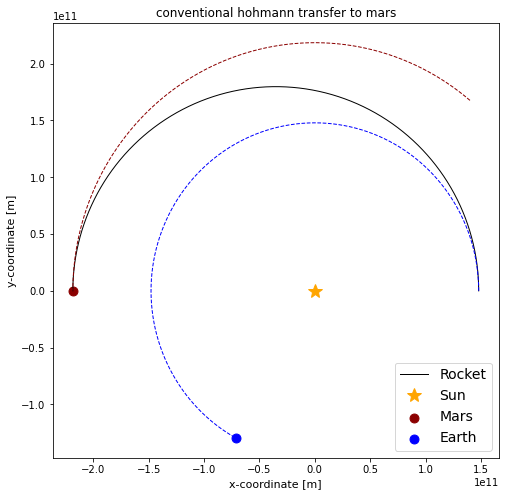

In [52]:
#Create figure
fig=plt.figure(figsize=(8,8))
#Create 3D axes
ax=fig.add_subplot(111)

#append all so they are all the same length in the end
MX=np.append(MX,mars.pos[0])
MY=np.append(MY,mars.pos[1])
EX=np.append(EX,earth.pos[0])
EY=np.append(EY,earth.pos[1])
VX=np.append(VX,venus.pos[0])
VY=np.append(VY,venus.pos[1])
RX=np.append(RX,rocket.pos[0])
RY=np.append(RY,rocket.pos[1])
speed=np.append(speed,np.linalg.norm(rocket.vel))
hams=np.append(hams,epsilon(rocket.pos,speed[1],sun,earth,mars,venus))

#-----------------------
for i in range(0,n):
    earth.pos=earth.dist*np.array([np.cos(2*PI*dt*i/earth.period+earth.theta),np.sin(2*PI*dt*i/earth.period+earth.theta)])
    mars.pos=mars.dist*np.array([np.cos(2*PI*dt*i/mars.period+mars.theta),np.sin(2*PI*dt*i/mars.period+mars.theta)])
    venus.pos=venus.dist*np.array([np.cos(2*PI*dt*i/venus.period+venus.theta),np.sin(2*PI*dt*i/venus.period+venus.theta)])
    #print(rocket.vel)
    RK4_nbody(rocket, sun, earth, mars, venus, dt)
    
    #append all equally 
    
    RX=np.append(RX,rocket.pos[0])
    RY=np.append(RY,rocket.pos[1])
    MX=np.append(MX,mars.pos[0])
    MY=np.append(MY,mars.pos[1])
    EX=np.append(EX,earth.pos[0])
    EY=np.append(EY,earth.pos[1])
    VX=np.append(VX,venus.pos[0])
    VY=np.append(VY,venus.pos[1])
    speed=np.append(speed,np.linalg.norm(rocket.vel))
    hams=np.append(hams,epsilon(rocket.pos,speed[i+2],sun,earth,mars,venus))
    
    dist=np.linalg.norm(rocket.pos)
    if mars.dist-dist<mars.radius:
        marsvel=np.array([0,-23434.8])
        starting2=KE_per_mass(rocket)
        print("velocity before landing=", rocket.vel)
        burn2=marsvel-rocket.vel
        rocket.vel+=burn2
        burn2mag=np.linalg.norm(burn2)
        print("deltaV2:", burn2mag, "extra m/s")
        ending2=KE_per_mass(rocket)
        print("extra energy=", ending2-starting2,"j/kg")
        print("i=", i)
        if np.linalg.norm(mars.pos-rocket.pos)<mars.radius:
            print("perfect arrival")
            break
        else:
            print("Landing successfull")
            
            #append all so same lenght arrays "landing appends"
            RX=np.append(RX,MX[i])
            RY=np.append(RY,MY[i]-mars.radius)
            MX=np.append(MX,mars.pos[0])
            MY=np.append(MY,mars.pos[1])
            EX=np.append(EX,earth.pos[0])
            EY=np.append(EY,earth.pos[1])
            VX=np.append(VX,venus.pos[0])
            VY=np.append(VY,venus.pos[1])
            speed=np.append(speed,np.linalg.norm(rocket.vel))
            hams=np.append(hams,epsilon(rocket.pos,speed[i+3],sun,earth,mars,venus))
            #landing complete, rocket matching martian velocity 
            break
    if mars.pos[1]-1000<0:
        print("mars arrived first")
        break
        
plt.plot(RX, RY,label='Rocket', color="black", linewidth=1)
ax.plot(MX,MY, color="darkred", linewidth=1, linestyle="dashed" )
ax.plot(EX,EY, color="blue", linewidth=1, linestyle="dashed" )
#ax.plot(VX, VY, color="grey", linewidth=1)
ax.plot(0,0,label='Sun', marker="*", markersize=15, color="orange", linewidth=0)
#plot the final positions
ax.scatter(MX[i],MY[i], label="Mars", color="darkred", marker="o",s=80)
ax.scatter(EX[i],EY[i], label='Earth', color="blue", marker="o",s=80)
#ax.scatter(VX[i],VY[i], label='Venus', color="grey", marker="o",s=80)

#ax.annotate('$\Delta v_1$', xy=(EX[0],EY[0]), xytext=(5000000, 4),arrowprops=dict(facecolor='grey', shrink=0.01), fontsize=15)
#ax.annotate('$\Delta v_2$', xy=(mars.pos), xytext=(18000000, 12e+7),arrowprops=dict(facecolor='grey', shrink=0.01), fontsize=15)


ax.set_xlabel("x-coordinate [m]",fontsize=11)
ax.set_ylabel("y-coordinate [m]",fontsize=11)
ax.set_title("conventional hohmann transfer to mars",fontsize=12)
ax.legend(loc="lower right",fontsize=14)

In [9]:
print(rocket.pos)
print(np.linalg.norm(rocket.pos))
print(rocket.vel)
print(22141*dt)

[-2.18416076e+11  5.55150461e+09]
218486616359.6804
[     0.  -23434.8]
4428200


In [10]:
print(np.linalg.norm(mars.pos-rocket.pos))
print(mars.pos)
print(rocket.pos)

5493051491.4063225
[-2.18489992e+11  5.89504539e+07]
[-2.18416076e+11  5.55150461e+09]


In [38]:
print(1468/1283)

1.1441932969602495


In [12]:
transfer_time_theory= 2.23e+7# in seconds  2.238e+7 22349563.2
transfer_time_code=21129600 
c=transfer_time_code/mars.period
d=0.5-c
e=d*2*PI

print(e)
print(mars.pos)
print(mars.radius)

0.8752698084791446
[-2.18489992e+11  5.89504539e+07]
3389500


In [13]:
print(starting2)

245373427.62768653


In [14]:
print(rocket_vel_at_pole)
E11=0.5*(29468.0**2)
E22=0.5*(32719.0**2)
print(E22-E11)

29468.890323766533
101084968.5


energy difference= 13.780800499999984 Mj/kg


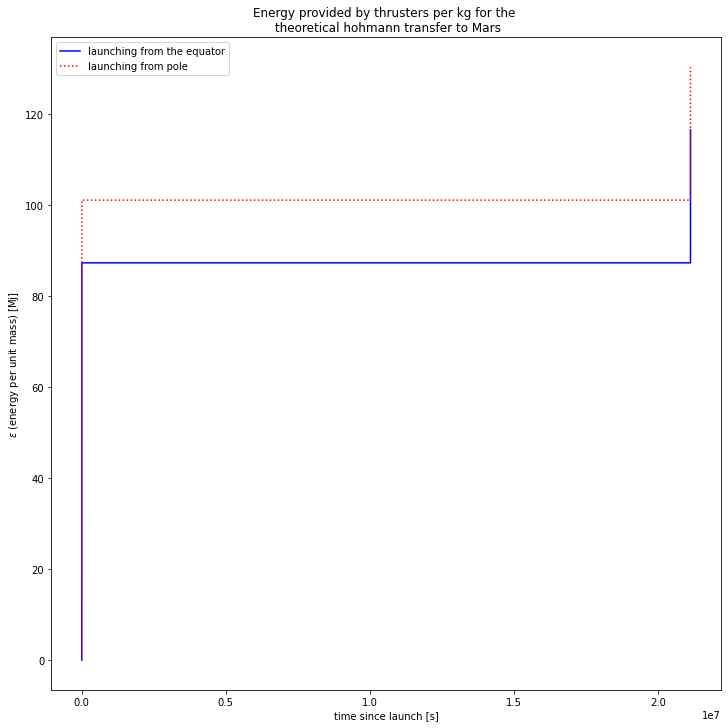

116.52566589231346
130.30646639231344


In [48]:
fig=plt.figure(figsize=(12,12))
dE2=29.22149789231345     #MJ
dE1=87.304168     #MJ
dE1_pole=101.0849685
E=np.zeros(i)
E_pole=np.zeros(i)
X=np.zeros(i)
E[0]=0
X[0]=0
E_pole[0]=0
for k in range(1,i):
    E_pole[k]=dE1_pole
    E[k]=dE1
    X[k]=k*dt
E[i-1]=dE1+dE2
E_pole[i-1]=dE1_pole+dE2

print("energy difference=",E_pole[i-1]-E[i-1], "Mj/kg")

plt.plot(X,E, label='launching from the equator', color="blue")
plt.plot(X,E_pole, label='launching from pole', color="red", linestyle="dotted")
plt.title("Energy provided by thrusters per kg for the \n theoretical hohmann transfer to Mars")
plt.xlabel("time since launch [s]")
plt.ylabel("$\epsilon$ (energy per unit mass) [Mj]")
plt.legend(loc="best")
plt.show()
print(E[i-1])
print(E_pole[i-1])

In [10]:
print(130/116.5)

1.1158798283261802


In [17]:
print(len(MX))
print(len(RX))
print(len(speed))

105652
105652
105652


In [49]:
np.savetxt('rocket_Xpos_dt200.txt', RX)
np.savetxt('rocket_Ypos_dt200.txt', RY)
np.savetxt('rocket_speed_dt200.txt', speed)
np.savetxt('mars_Xpos_dt200.txt', MX)
np.savetxt('mars_Ypos_dt200.txt',MY)
np.savetxt('earth_Xpos_dt200.txt', EX)
np.savetxt('earth_Ypos_dt200.txt', EY)
np.savetxt('venus_Xpos_dt200.txt', VX)
np.savetxt('venus_Ypos_dt200.txt', VY)
np.savetxt('hamiltonian_dt200.txt',hams)

In [37]:
print(len(RX),len(RY))
print(len(MX),len(MY))
print(len(EX),len(EY))
print(len(speed))
print(len(hams))

105652 105652
105652 105652
105652 105652
105652
105652


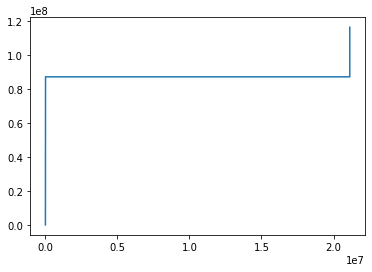

In [40]:
timen=np.zeros(len(hams))
e0=hams[0]
plothams=np.zeros(len(hams))
for i in range(0,len(hams)):
    timen[i]=dt*i
    plothams[i]=hams[i]-hams[0]
plt.plot(timen,plothams)

In [21]:
print(speed[0],speed[1])

29932.0 32719.0


In [22]:
print(speed[105650],speed[105651])

22152.80693852075 23434.8


In [23]:
vsq=G*sun.mass*((2/earth.dist)-(2/(earth.dist+mars.dist)))
print(np.sqrt(vsq))

32719.58268669747


In [24]:
print(len(speed))
print(speed[105650])

105652
22152.80693852075


In [25]:
print(23434.843935911023-22151.497418720723)

1283.3465171903008


In [14]:
g_at_mars_from_sun=G*sun.mass/(mars.dist**2)
g_at_mars_from_mars=G*6.39e+23/(mars.radius**2)
print(g_at_mars_from_sun)
print(g_at_mars_from_mars)

0.0027815382610590625
3.7112881317552593


In [34]:
print(0.5*speed[105651]**2-0.5*speed[105650]**2)

29221497.89231345
